## Lab 9
Extraction de primitives

In [1]:
from skimage import feature, data, filters
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris. Testez avec différent seuil.

## 

(512, 512) 63 207


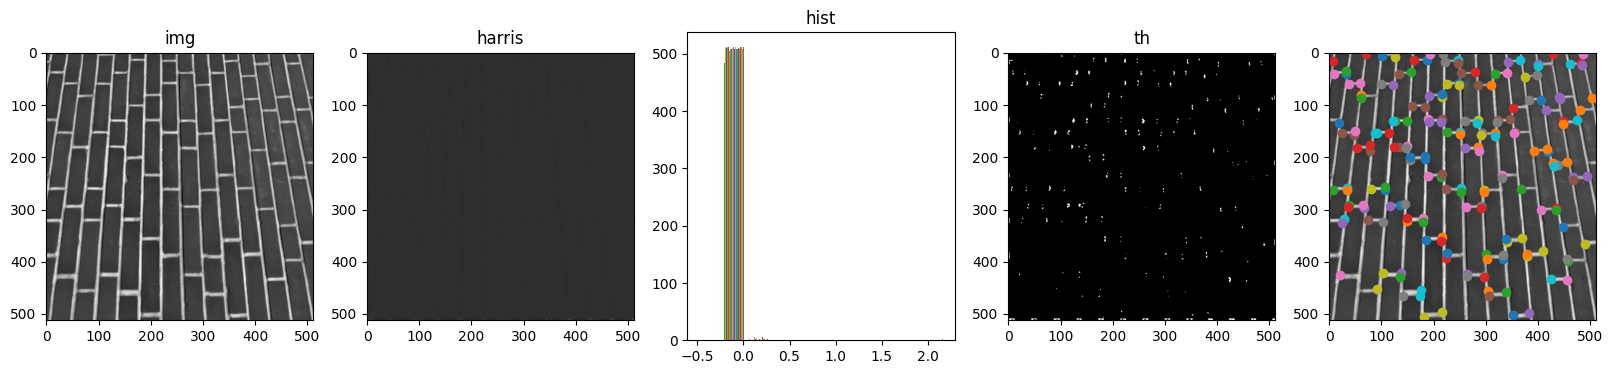

In [51]:
img = data.brick()
print(img.shape, img.min(), img.max())

plt.figure(figsize=(20, 4))

plt.subplot(151); plt.imshow(img, cmap="gray"); plt.title('img')

img_harris = feature.corner_harris(img)

plt.subplot(152); plt.imshow(img_harris, cmap="gray"); plt.title('harris')

plt.subplot(153); plt.hist(img_harris); plt.title('hist')

threshold = img_harris > 0.01

plt.subplot(154); plt.imshow(threshold, cmap="gray"); plt.title('th')

locaux = feature.peak_local_max(img, labels=threshold, min_distance=3)
plt.subplot(155); plt.imshow(img, cmap='gray');
for c,l in locaux:
    plt.scatter(l,c)

plt.show()

(512, 512) 63 207
(512, 512) -0.5025452245700637 2.1881876429928067


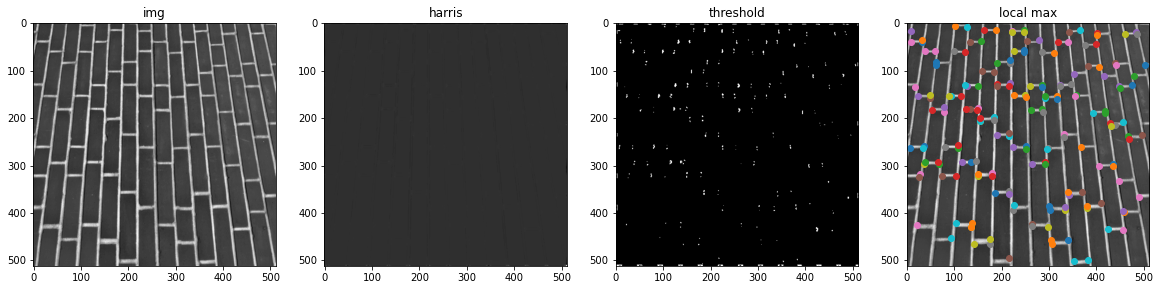

In [16]:
img = data.brick()
print(img.shape, img.min(), img.max())

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(img, cmap="gray"); plt.title('img')

...

plt.show()

## Exercice 2
Appliquer un filtre détecteur de forme pour faire resortir les contours continus (lignes/tubes) dans l'image.

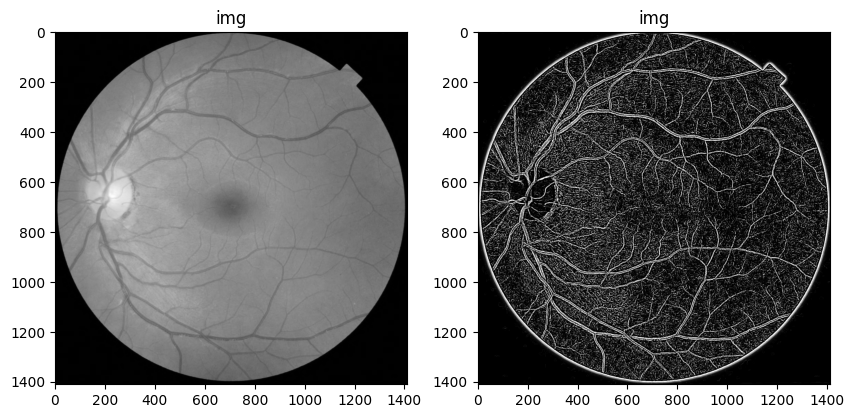

In [62]:
img = data.retina().mean(axis=2)
plt.figure(figsize=(10, 10))
plt.subplot(121); plt.imshow(img, cmap="gray"); plt.title("img")

plt.subplot(122); plt.imshow(filters.frangi(img,sigmas=(5,10,1)), cmap="gray"); plt.title("img")

plt.show()

## Exercice 3
Calculer le tenseur (H) pour `sub_img`.

## 

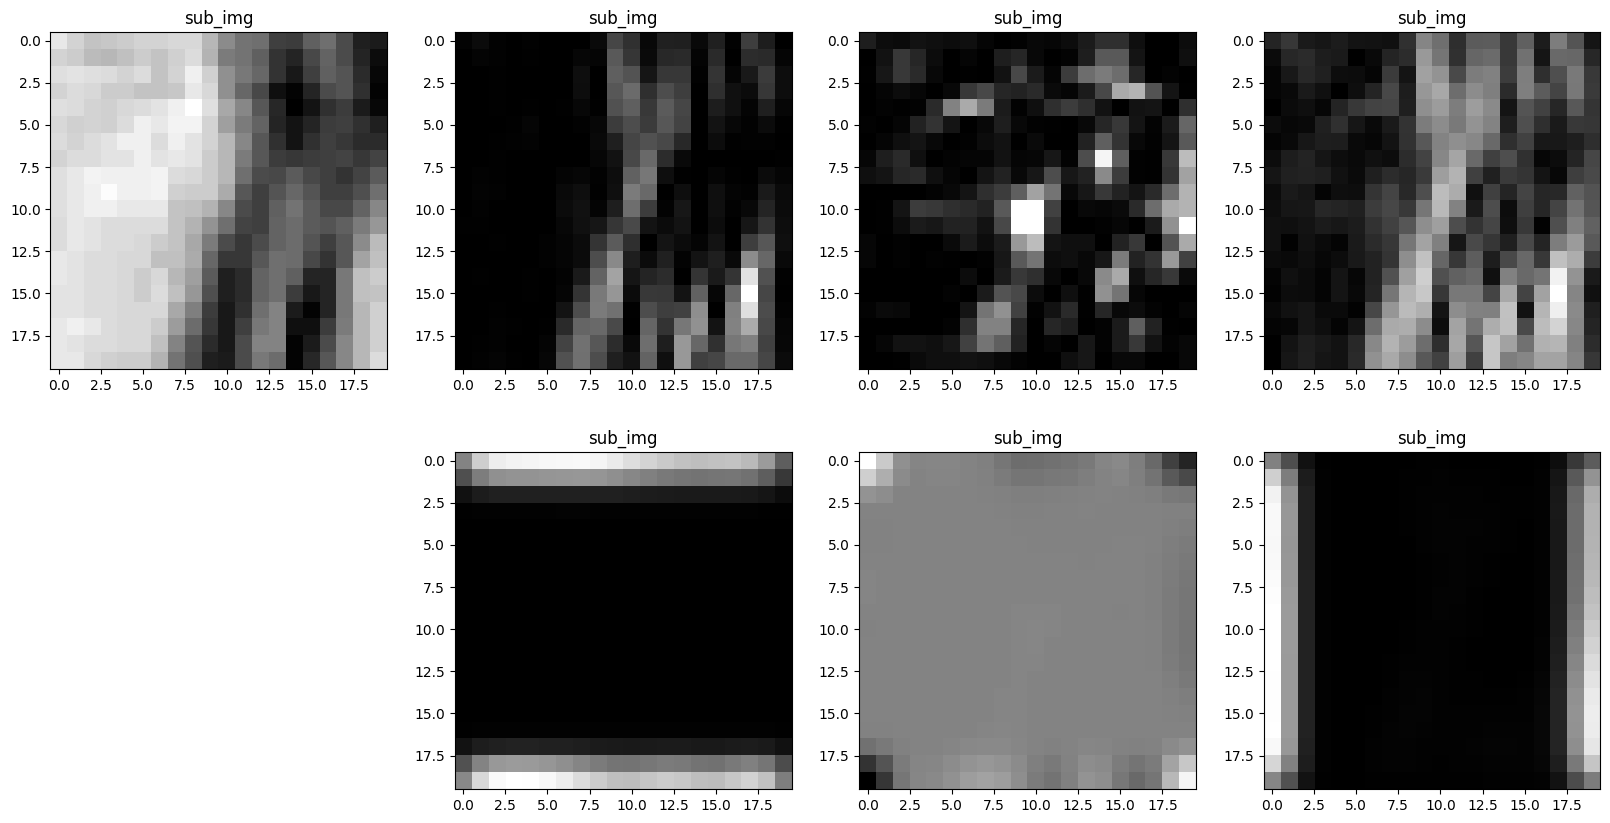

In [72]:
sub_img = img[10:30, 690:710]

plt.figure(figsize=(20, 10))

plt.subplot(241); plt.imshow(sub_img, cmap='gray'); plt.title('sub_img')

A = sub_img.copy() 
B = sub_img.copy()
C = sub_img.copy()

A = filters.sobel_v(A) ** 2
B = filters.sobel_h(B) ** 2    
C = filters.sobel(C)

A = filter.gaussian(A, sigma=1)
A = filter.gaussian(A, sigma=1)
A = filter.gaussian(A, sigma=1)


plt.subplot(242); plt.imshow(A, cmap='gray'); plt.title('sub_img')
plt.subplot(243); plt.imshow(B, cmap='gray'); plt.title('sub_img')
plt.subplot(244); plt.imshow(C, cmap='gray'); plt.title('sub_img')

a, b, c = feature.structure_tensor(sub_img)

plt.subplot(246); plt.imshow(a, cmap='gray'); plt.title('sub_img')
plt.subplot(247); plt.imshow(b, cmap='gray'); plt.title('sub_img')
plt.subplot(248); plt.imshow(c, cmap='gray'); plt.title('sub_img')


plt.show()